---------------------------------------------------
<h1>TELCO CHURN ANALYSIS</h1>
  <h6> by David Berchelmann -- March 9, 2021 </h6>
  
  ------------------------------------------------

<h3><u>We want to answer a question</u></h3>
          
</br>

<i><font color = red><h4>Why are customers churning?</h4></font></i>
</br>
   - <b>How will we go about this?</b>
        * Acquire the Data
        * Prepare 
        * Explore 
        * Evaluate
        * Create Recommendations Based On Findings </list>

--------------------------

<h2> Executive Summary </h2>

-----------------

<h5>Let's import some libaries to get started</h5>

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns



------
<h3>Time to Acquire the Data</h3>

-----

In [3]:
from acquire import get_connection, new_telco_data, get_telco_data

In [4]:
df = get_telco_data()

-------
<h5> Now that we have the data, let's analyze it so we know what we are working with and see what we will need to do to prepare it properly.</h5>

- <b>We will look at the following:</b>
    * To make sure the data was imported properly, we will look at the first few rows
    * The shape (Number of Rows, Number of Columns)
    * Information regarding data types and if we are missing data
    * We will describe the dataset (quick snapshot showing stats on columns w/ numeric data types)
    * Finally we will plot a few histograms to get a look at the distribution of some of our variables

-------

In [5]:
# Let's look at the first couple rows

df.head(2)

,payment_type_id,internet_service_type_id,contract_type_id,customer_id,gender,senior_citizen,partner,dependents,tenure,phone_service,...,tech_support,streaming_tv,streaming_movies,paperless_billing,monthly_charges,total_charges,churn,contract_type,internet_service_type,payment_type
0,2,1,1,0003-MKNFE,Male,0,No,No,9,Yes,...,No,No,Yes,No,59.9,542.4,No,Month-to-month,DSL,Mailed check
1,4,1,1,0013-MHZWF,Female,0,No,Yes,9,Yes,...,Yes,Yes,Yes,Yes,69.4,571.45,No,Month-to-month,DSL,Credit card (automatic)


In [7]:
# Let's analyze the shape to see how many rows and columns
df.shape

(7043, 24)

In [9]:
# Now we will look at the data types and determine if missing values appears
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 24 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   payment_type_id           7043 non-null   int64  
 1   internet_service_type_id  7043 non-null   int64  
 2   contract_type_id          7043 non-null   int64  
 3   customer_id               7043 non-null   object 
 4   gender                    7043 non-null   object 
 5   senior_citizen            7043 non-null   int64  
 6   partner                   7043 non-null   object 
 7   dependents                7043 non-null   object 
 8   tenure                    7043 non-null   int64  
 9   phone_service             7043 non-null   object 
 10  multiple_lines            7043 non-null   object 
 11  online_security           7043 non-null   object 
 12  online_backup             7043 non-null   object 
 13  device_protection         7043 non-null   object 
 14  tech_sup

---------
<h4> One items that stands out above the information above is that our <font color = 'red'>'total_charges'</font> column is displaying a data type as 'object'. This will present issues when analyzing down the line.</h4>

  - Instead of changing this data type in the Prepare section, I will convert it now so I can make sure there are no missing values. If there are, I will be able to address when we prepare the data.
  ------

In [10]:
# Converting the total charges column to a numeric type from object

df["total_charges"] = pd.to_numeric(df.total_charges, errors='coerce')

In [13]:
# Let's analyze our data types once again to confirm the change & look for missing values

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 24 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   payment_type_id           7043 non-null   int64  
 1   internet_service_type_id  7043 non-null   int64  
 2   contract_type_id          7043 non-null   int64  
 3   customer_id               7043 non-null   object 
 4   gender                    7043 non-null   object 
 5   senior_citizen            7043 non-null   int64  
 6   partner                   7043 non-null   object 
 7   dependents                7043 non-null   object 
 8   tenure                    7043 non-null   int64  
 9   phone_service             7043 non-null   object 
 10  multiple_lines            7043 non-null   object 
 11  online_security           7043 non-null   object 
 12  online_backup             7043 non-null   object 
 13  device_protection         7043 non-null   object 
 14  tech_sup

----------
<h4>Our <font color = 'red'>total_charges</font> column has been changed and we now see that there are 11 NaN values This will be addressed in the upcoming 'Prepare' section.</h4>

---------

In [12]:
# Let's describe the dataset and get a look at values across our variables with numeric data types
df.describe().T

,count,mean,std,min,25%,50%,75%,max
payment_type_id,7043.0,2.315633,1.148907,1.00,1.00,2.000,3.0000,4.00
internet_service_type_id,7043.0,1.872923,0.737796,1.00,1.00,2.000,2.0000,3.00
contract_type_id,7043.0,1.690473,0.833755,1.00,1.00,1.000,2.0000,3.00
senior_citizen,7043.0,0.162147,0.368612,0.00,0.00,0.000,0.0000,1.00
tenure,7043.0,32.371149,24.559481,0.00,9.00,29.000,55.0000,72.00
monthly_charges,7043.0,64.761692,30.090047,18.25,35.50,70.350,89.8500,118.75
total_charges,7032.0,2283.300441,2266.771362,18.80,401.45,1397.475,3794.7375,8684.80


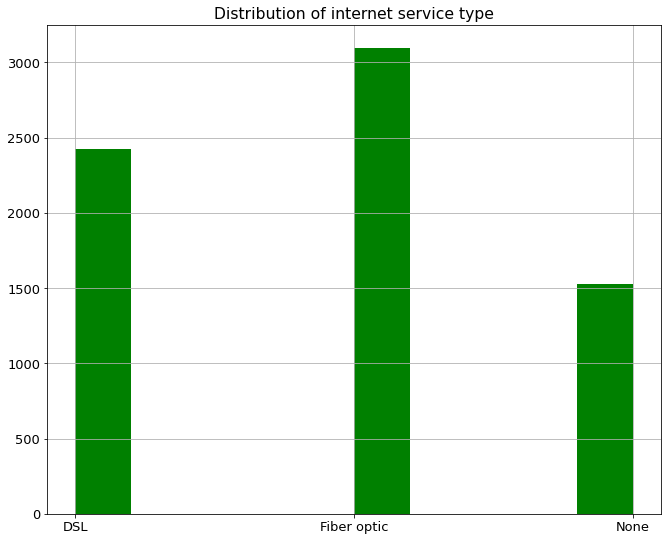

In [14]:
# I'm curious to some of our data distributions, let look at some histogram plots

df['internet_service_type'].hist(color='green')

plt.title('Distribution of internet service type')
plt.show()

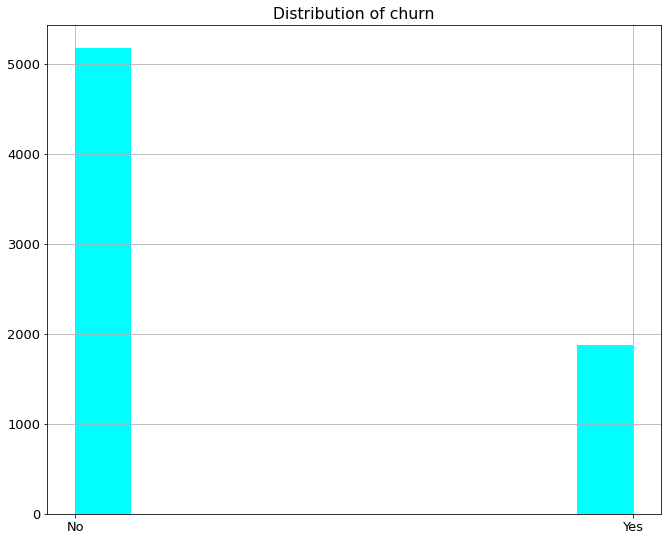

In [15]:
df['churn'].hist(color='cyan')

plt.title('Distribution of churn')
plt.show()

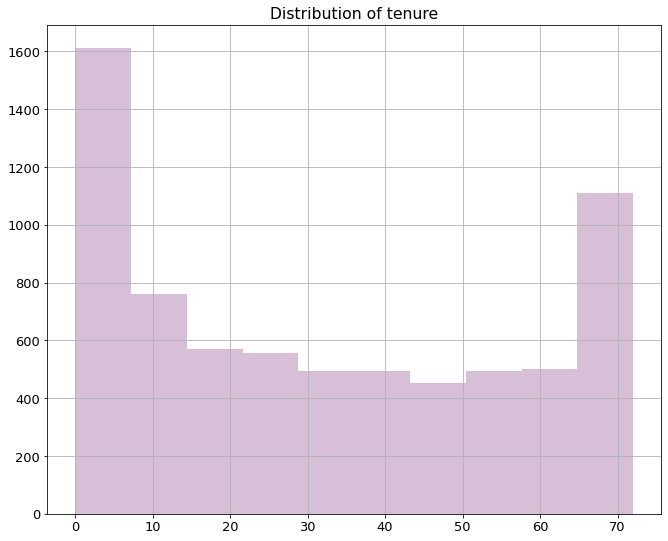

In [16]:
df['tenure'].hist(color='thistle')

plt.title('Distribution of tenure')
plt.show()

In [17]:
# I'd like to see stats for just the monthly charges & total charges columns

telco_stats = df[['monthly_charges', 'total_charges']].describe().T
telco_stats

,count,mean,std,min,25%,50%,75%,max
monthly_charges,7043.0,64.761692,30.090047,18.25,35.50,70.350,89.8500,118.75
total_charges,7032.0,2283.300441,2266.771362,18.80,401.45,1397.475,3794.7375,8684.80


<h3>Let's Prepare the Data</h3>

<h3>We Are Now Ready to Explore & Analyze</h3>

<h3>Modeling & Evaluation Happens Now</h3>

<h3>Key Takeaways, Recommendations, & Next Steps</h3>